# Regex 1

## Reading

- New text: "Principles and Techniques of Data Science", by Sam Lau, Joey Gonzalez, and Deb Nolan
- Used for Berkeley's DS100 Course.
- Read Chapter 13: https://www.textbook.ds100.org/ch/13/text_regex.html


## Regular expressions aka Regex

- Regex: a small language for describing patterns to search for regex patterns are used in many different programming languages (like how many different languages might use SQL queries)
- https://blog.teamtreehouse.com/regular-expressions-10-languages
- Inventor: Stephen Cole Kleene (UW-Madison mathematician) --- https://en.wikipedia.org/wiki/Stephen_Cole_Kleene

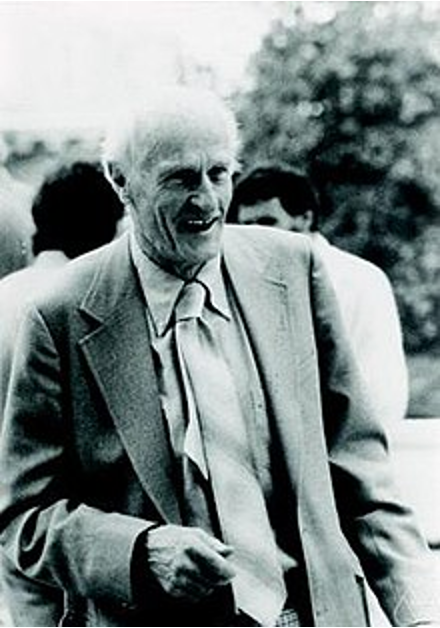

### Review of `str.find(<search string>)` method

- `str.find(<search string>)` method returns the index of the first matching occurrence of the search string 
- `str.find` is VERY limited -- what if we want to:
    - find all occurrences of "320"
    - find any 3-digit numbers?
    - find any numbers at all?
    - find a number before the word "projects"?
    - substitute a number for something else?

Regexes can do all these things!

In [1]:
msg = "In CS 320,\tthere are 40 lectures, 10 quizzes, 3 exams,\t7 projects, and 1000 things to learn. CS 320 is awesome!"

# does the string contain "320"?
has_320 = msg.find("320") >= 0
print(has_320, msg.find("320"))

True 6


In [2]:
# prints tab between A and B
print("A\tB")
# what if we want to literally print \t between A and B?
# we need to use escape sequence (\)
print("A\\tB")

A	B
A\tB


### Raw string

- easier way to tell Python to print content using raw format of the string than remembering to use escape sequence always
- Syntax: `r"<some string>"` ---> add "r" in the front

In [3]:
print(r"A\tB")

A\tB


In [4]:
#import statements
import re

In [5]:
# Example strings
# from DS100 book...
def reg(regex, text):
    """
    Prints the string with the regex match highlighted.
    """
    print(re.sub(f'({regex})', r'\033[1;30;43m\1\033[m', text))
s1 = " ".join(["A DAG is a directed graph without cycles.",
               "A tree is a DAG where every node has one parent (except the root, which has none).",
               "To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯"])
print(s1)

s2 = """1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)
"""
print(s2)

s3 = "In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn.  CS 320 is awesome!"
print(s3)

s4 = """In CS 320,  there are 14 quizzes,    7 projects,
41 lectures, and 1000 things to learn.  CS 320 is awesome!"""
print(s4)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯
1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)

In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn.  CS 320 is awesome!
In CS 320,  there are 14 quizzes,    7 projects,
41 lectures, and 1000 things to learn.  CS 320 is awesome!


In [6]:
print(s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Regex: double escaping (use case for raw strings)

- Regex does another level of formatting with special sequences like \t, \n, etc.,

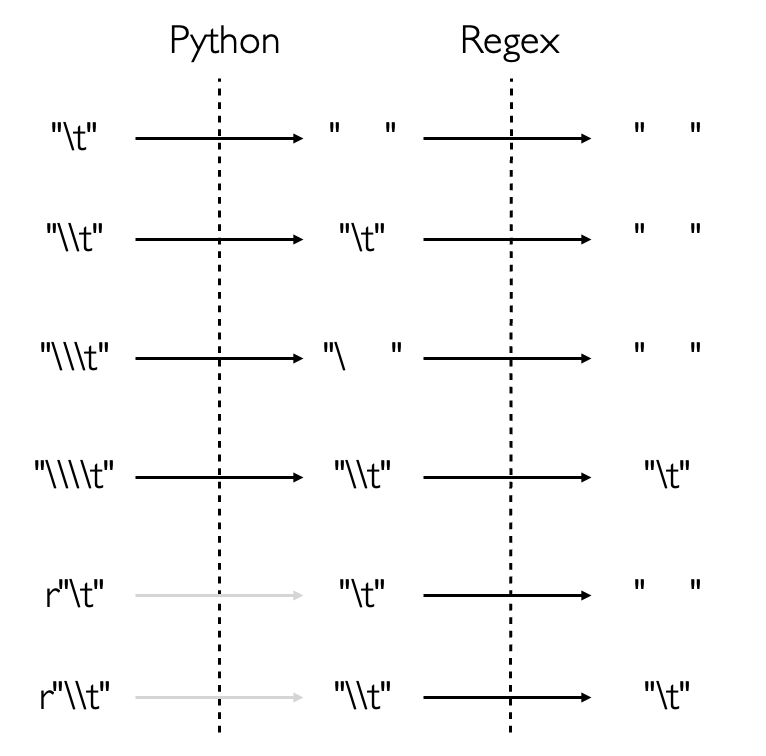

#### Find the right arm "\".

- `reg(<PATTERN>, <STRING>)`

In [7]:
# Python will be unhappy 
# \ works as escape sequence here and it is trying to escape the second ",
# meaning it thinks we are mentioning " literal
# reg("\", s1) # uncomment to see error

In [8]:
# Regex will be unhappy
# reg("\\", s1) # uncomment to see error

In [9]:
# Correct and cumbersome way to do this
reg("\\\\", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [10]:
# Better way would be to use raw string to avoid double escaping
reg(r"\\", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Regex is case sensitive

#### Find all occurrences of "a".

In [11]:
reg(r"a", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find all occurrences of "A".

In [12]:
reg(r"A", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Character classes

- Character classes can be mentioned within `[...]`
- `^` means `NOT` of a character class
- `-` enables us to mention range of characters, for example `[A-Z]`
- `|` enables us to perform `OR`

#### Find both "a" and "A".

In [13]:
# Doesn't work - because we are trying to match literally for "aA"
reg("aA", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [14]:
reg("[aA]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find all the vowels.

In [15]:
reg("[aeiouAEIOU]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find everything except vowels.

In [16]:
reg("[^aeiouAEIOU]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find all capital letters.

In [17]:
reg("[A-Z]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### What if we want to find "A", "Z", and "-"?

In [18]:
# How can we change this to do that?
reg(r"[A\-Z]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Invalid ranges don't work. For example: `[Z-A]`.

In [19]:
# reg("[Z-A]", s1) # uncomment to see error

#### Find all words related to graphs.

In [20]:
# | means OR
reg(r"tree|directed|undirected|graph|DAG|node|child|parent|root|cycles", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Metacharacters

- predefined character classes
    - `\d` => digits
    - `\s` => whitespace (space, tab, newline)
    - `\w` => "word" characters (digits, letters, underscores, etc) --- helpful for variable name matches
    - `.` => wildcard: anything except newline
- capitalized version of character classes mean `NOT`, for example `\D` => everything except digits

#### Find all digits.

In [21]:
# v1
reg(r"[0-9]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [22]:
# v2 - with metacharacters
reg(r"\d", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find all whitespaces.

In [23]:
reg(r"\s", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find everything except whitespaces.

In [24]:
reg(r"\S", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find anything except newline.

In [25]:
reg(r".", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### What if we want to actually match "."?

In [26]:
#How can we change this to do that?
reg(r"\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### REPETITION

- `<character>{<num matches>}` - for example: `w{3}`
- matches cannot overlap

#### Find all "www".

In [27]:
# v1
reg(r"www", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [28]:
# v2 - repitition
reg(r"w{3}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [29]:
# Lesson: matches cannot overlap
reg(r"w{2}", s1) 

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Variable length repitition operators

- `*` => 0 or more (greedy: match as many characters as possible)
- `+` => 1 or more (greedy: match as many characters as possible)
- `?` => 0 or 1
- `*?` => 0 or more (non-greedy: match as few characters as possible)
- `+?` => 1 or more (non-greedy: match as few characters as possible)

#### Find everything inside of parentheses.

In [30]:
# this doesn't work
# it captures everything because () have special meaning (coming up)
reg(r"(.*)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [31]:
# How can we change this to not use special meaning of ()?
# * is greedy: match as many characters as possible
reg(r"\(.*\)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [32]:
# non-greedy: stop at the first possible spot instead of the last possible spot
reg(r"\(.*?\)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Anchor characters
- `^` => start of string
    - `^` is overloaded --- what was the other usage?
- `$` => end of string

#### Find everything in the first sentence.

In [33]:
# doesn't work because remember regex finds all possible matches
# so it matches every single sentence 
# (even though we are doing non-greedy match)
reg(r".*?\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [34]:
reg(r"^.*?\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find everything in the first two sentences.

In [35]:
reg(r"^(.*?\.){2}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find last "word" in the sentence.

In [36]:
reg(r"\S+$", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Case study: find all phone numbers.

In [37]:
print(s2)
# The country code (1) in the front is optional
# The area code (608) is also optional
# Doesn't make sense to match country code without area code though!

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [38]:
# Full US phone numbers
reg(r"\d-\d{3}-\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [39]:
# The country code (1) in the front is optional
reg(r"(\d-)?\d{3}-\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [40]:
# The area code (608) is also optional
# Doesn't make sense to have country code without area code though!
reg(r"(\d-)?(\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [41]:
# This is good enough for 320 quizzes/tests
# But clearly, the last match is not correct
reg(r"((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



Regex documentation link: https://docs.python.org/3/library/re.html.

In [42]:
# BONUS: negative lookbehind (I won't test this)
reg(r"(?<!\d\-)((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



There is also a negative lookahead. For example, how to avoid matching "1-608-123-456" in "1-608-123-4569999". You can explore this if you are interested.

In [43]:
reg(r"(?<!\d\-)((\d-)?\d{3}-)?\d{3}-\d{4}", "608-123-4569999")

608-123-4569999


### Testing your regex
- you could use `reg(...)` function
- another useful resource: https://regex101.com/

### `re` module
- `re.findall(<PATTERN>, <SEARCH STRING>)`: regular expression matches
    - returns a list of strings 
- `re.sub(<PATTERN>, <REPLACEMENT>, <SEARCH STRING>)`: regular expression match + substitution
    - returns a new string with the substitutions (remember strings are immutable)

In [44]:
print(msg)

In CS 320,	there are 40 lectures, 10 quizzes, 3 exams,	7 projects, and 1000 things to learn. CS 320 is awesome!


#### Find all digits.

In [45]:
re.findall(r"\d+", msg)

['320', '40', '10', '3', '7', '1000', '320']

### Groups
- we can capture matches using `()` => this is the special meaning of `()`
- returns a list of tuples, where length of the tuple will be number of groups

#### Find all digits and the word that comes after that.

In [46]:
re.findall(r"(\d+) (\w+)", msg)

[('40', 'lectures'),
 ('10', 'quizzes'),
 ('3', 'exams'),
 ('7', 'projects'),
 ('1000', 'things'),
 ('320', 'is')]

### Unlike matches, groups can overlap

#### Find and group all digits and the word that comes after that.

In [47]:
re.findall(r"((\d+) (\w+))", msg)

[('40 lectures', '40', 'lectures'),
 ('10 quizzes', '10', 'quizzes'),
 ('3 exams', '3', 'exams'),
 ('7 projects', '7', 'projects'),
 ('1000 things', '1000', 'things'),
 ('320 is', '320', 'is')]

#### Substitute all digits with "###".

In [48]:
re.sub(r"\d+", "###", msg)

'In CS ###,\tthere are ### lectures, ### quizzes, ### exams,\t### projects, and ### things to learn. CS ### is awesome!'

#### Substitute all whitespaces with single white space.

In [49]:
print(msg)

In CS 320,	there are 40 lectures, 10 quizzes, 3 exams,	7 projects, and 1000 things to learn. CS 320 is awesome!


In [50]:
re.sub(r"\s+", " ", msg)

'In CS 320, there are 40 lectures, 10 quizzes, 3 exams, 7 projects, and 1000 things to learn. CS 320 is awesome!'

### How to use groups is substitution?
- `\g<N>` gives you the result of the N'th grouping.

#### Substitute all whitespaces with single white space.

In [51]:
print(re.sub(r"(\d+)", "<b>\g<1></b>", msg))

In CS <b>320</b>,	there are <b>40</b> lectures, <b>10</b> quizzes, <b>3</b> exams,	<b>7</b> projects, and <b>1000</b> things to learn. CS <b>320</b> is awesome!


In CS <b>320</b>, there are <b>40</b> lectures, <b>10</b> quizzes, <b>3</b> exams, <b>7</b> projects, and <b>1000</b> things to learn. CS <b>320</b> is awesome!